# Group Project - Salary Gap

## Introduction

### OECD Member Countries

Today the [OECD](https://www.oecdwatch.org/oecd-guidelines/oecd) consists of 34 countries, including members characterised as emerging economies. Additionally, the OECD works closely with several countries from Asia, Africa, Latin America and the Caribbean to further shape its work.

The 34 OECD member countries are: Australia, Austria, Belgium, Canada, Chile, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, Korea, Luxembourg, Mexico, the Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, the United Kingdom, and the United States.

### Hipotheses

There is a strong correlation between salary gap and paternal leave compensation

### Libraries Import

In [1]:
# Standard scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import datetime as dt

# Visualization 
 
# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

# Seaborn
import seaborn as sns
sns.set(color_codes=True)

### Load data

In [2]:
# Import the dataset
ilostat = pd.read_csv("../datasets/cleaned_ilostatOECDUSD.csv", sep=',', \
                  dtype = None, error_bad_lines=False, \
                  encoding='utf-8', keep_default_na=False)

# Extract the data into pandas dataframe
df = pd.DataFrame(ilostat)

df.head()

,country,sex,occupation,currency,source,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,avgyearpay,avgmonthpay
0,Australia,Male,Managers,USD,Establishment survey,,,,,,,,9118.0,,,,9118.0,759.83
1,Australia,Male,Professionals,USD,Establishment survey,,,,,,,,7115.0,,,,7115.0,592.92
2,Australia,Male,Technicians,USD,Establishment survey,,,,,,,,5478.0,,,,5478.0,456.50
3,Australia,Female,Managers,USD,Establishment survey,,,,,,,,6797.0,,,,6797.0,566.42
4,Australia,Female,Professionals,USD,Establishment survey,,,,,,,,5224.0,,,,5224.0,435.33


Exclude currency, source, and years columns since all the salaries are in USD, and survey is insignificant.

In [4]:
df = df[['country','occupation','maleavgweekpay','femaleavgweekpay','gapavgweekpay','gapweekpay', \
        'mothertotleave','fathertotleave','gapleaveweeks','gapleave']]
df.head()

,country,occupation,maleavgweekpay,femaleavgweekpay,gapavgweekpay,gapweekpay,mothertotleave,fathertotleave,gapleaveweeks,gapleave
0,Australia,Managers,2279.50,1699.25,580.25,0.25,7.61,0.85,6.76,0.89
1,Australia,Professionals,1778.75,1306.00,472.75,0.27,7.61,0.85,6.76,0.89
2,Australia,Technicians,1369.50,829.50,540.00,0.39,7.61,0.85,6.76,0.89
3,Austria,Agricultural and fishery,483.50,342.75,140.75,0.29,51.20,6.93,44.27,0.86
4,Austria,Clericals,956.81,723.33,233.48,0.24,51.20,6.93,44.27,0.86


Statistical summary

In [5]:
df.describe()

,maleavgweekpay,femaleavgweekpay,gapavgweekpay,gapweekpay,mothertotleave,fathertotleave,gapleaveweeks,gapleave
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,870.097490,695.166111,174.931379,0.196747,30.311285,3.460000,26.851285,0.866225
std,607.651444,477.248979,164.170999,0.093379,19.542288,3.795022,19.559763,0.163828
min,62.060000,51.250000,-24.500000,-0.040000,7.610000,0.000000,6.760000,0.380000
25%,365.080000,299.750000,58.120000,0.140000,14.000000,0.400000,11.000000,0.860000
50%,743.376667,598.900000,122.620000,0.200000,25.160000,2.000000,22.920000,0.950000
75%,1189.750000,962.620000,233.480000,0.260000,42.600000,5.660000,36.950000,0.980000
max,3059.935000,2276.620000,918.060000,0.490000,84.960000,12.540000,82.960000,1.000000


### Salary distribution

The salary distribution of male vs female, seems that most female (pink) work on job fields with **low salary**.

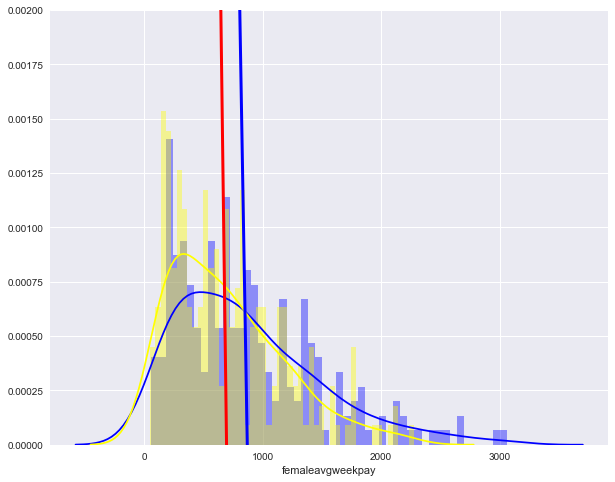

In [6]:
ax1 = sns.distplot(df['maleavgweekpay'], bins=100, color='blue',label='Male')
ax2 = sns.distplot(df['femaleavgweekpay'], bins=100, color='yellow',label='Female')
ax.set(ylim=(0, 0.002))
plt.plot([df['maleavgweekpay'].mean(),df['maleavgweekpay'].median()],[0, 0.004], linewidth=2, color='blue',label='Male mean')
plt.plot([df['femaleavgweekpay'].mean(),df['femaleavgweekpay'].median()],[0, 0.004], linewidth=2, color='red',label='Female mean')
 
plt.show()

0.8031482550119872

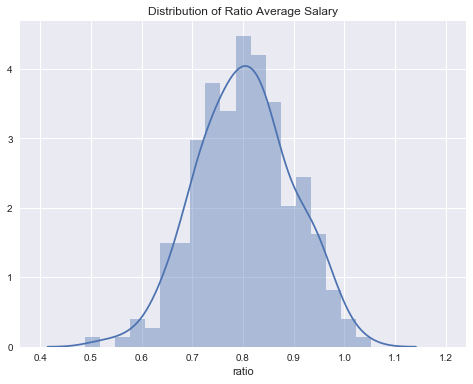

In [7]:
df['ratio'] = df.femaleavgweekpay/df.maleavgweekpay

sns.distplot(df.ratio, bins = np.linspace(0.4,1.2,28))
plt.title('Distribution of Ratio Average Salary')

np.mean(df.ratio)

Which occupation has the biggest gap in weekly paid?

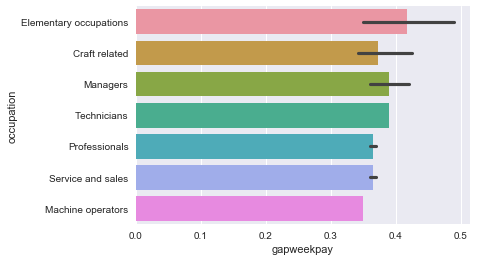

In [8]:
ax = sns.barplot(x="gapweekpay", y="occupation", data=df.sort_values('gapweekpay',ascending=False)[:15])

### Find the outlier

Find outlier in both sexes salary

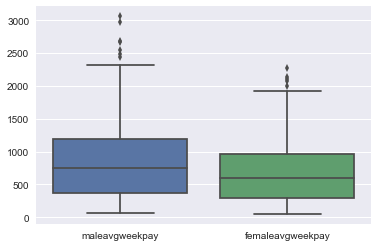

In [9]:
sns.boxplot(data=df[['maleavgweekpay','femaleavgweekpay']])

Find outlier in paternal leave

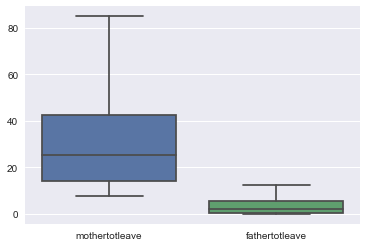

In [10]:
sns.boxplot(data=df[['mothertotleave','fathertotleave']])

### Correlation

Find the corellation of each data

In [11]:
df.corr()

,maleavgweekpay,femaleavgweekpay,gapavgweekpay,gapweekpay,mothertotleave,fathertotleave,gapleaveweeks,gapleave,ratio
maleavgweekpay,1,0.98,0.84,0.069,-0.24,0.24,-0.29,-0.18,-0.065
femaleavgweekpay,0.98,1,0.73,-0.088,-0.23,0.3,-0.29,-0.22,0.093
gapavgweekpay,0.84,0.73,1,0.51,-0.23,0.017,-0.23,-0.015,-0.51
gapweekpay,0.069,-0.088,0.51,1,-0.066,-0.25,-0.017,0.19,-1
mothertotleave,-0.24,-0.23,-0.23,-0.066,1,0.092,0.98,0.19,0.066
fathertotleave,0.24,0.3,0.017,-0.25,0.092,1,-0.1,-0.87,0.25
gapleaveweeks,-0.29,-0.29,-0.23,-0.017,0.98,-0.1,1,0.36,0.017
gapleave,-0.18,-0.22,-0.015,0.19,0.19,-0.87,0.36,1,-0.19
ratio,-0.065,0.093,-0.51,-1,0.066,0.25,0.017,-0.19,1


Find out value of correlation of **gapavgweekpay** to other

In [12]:
print(df.corr().iloc[2, :].sort_values())

ratio              -0.508796
gapleaveweeks      -0.228481
mothertotleave     -0.225320
gapleave           -0.015452
fathertotleave      0.017325
gapweekpay          0.512439
femaleavgweekpay    0.730829
maleavgweekpay      0.844166
gapavgweekpay       1.000000
Name: gapavgweekpay, dtype: float64


Draw correlation map of the features

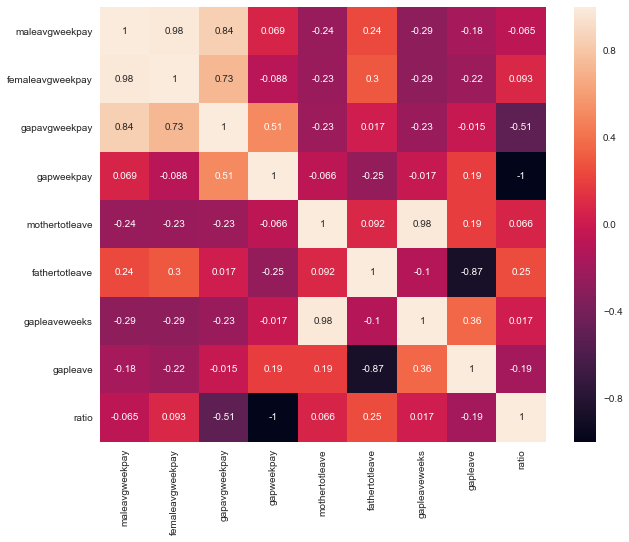

In [13]:
var_corr = df.corr()
sns.heatmap(var_corr, mask=np.zeros_like(var_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Fit linear regression models with the seaborn scatter plots:

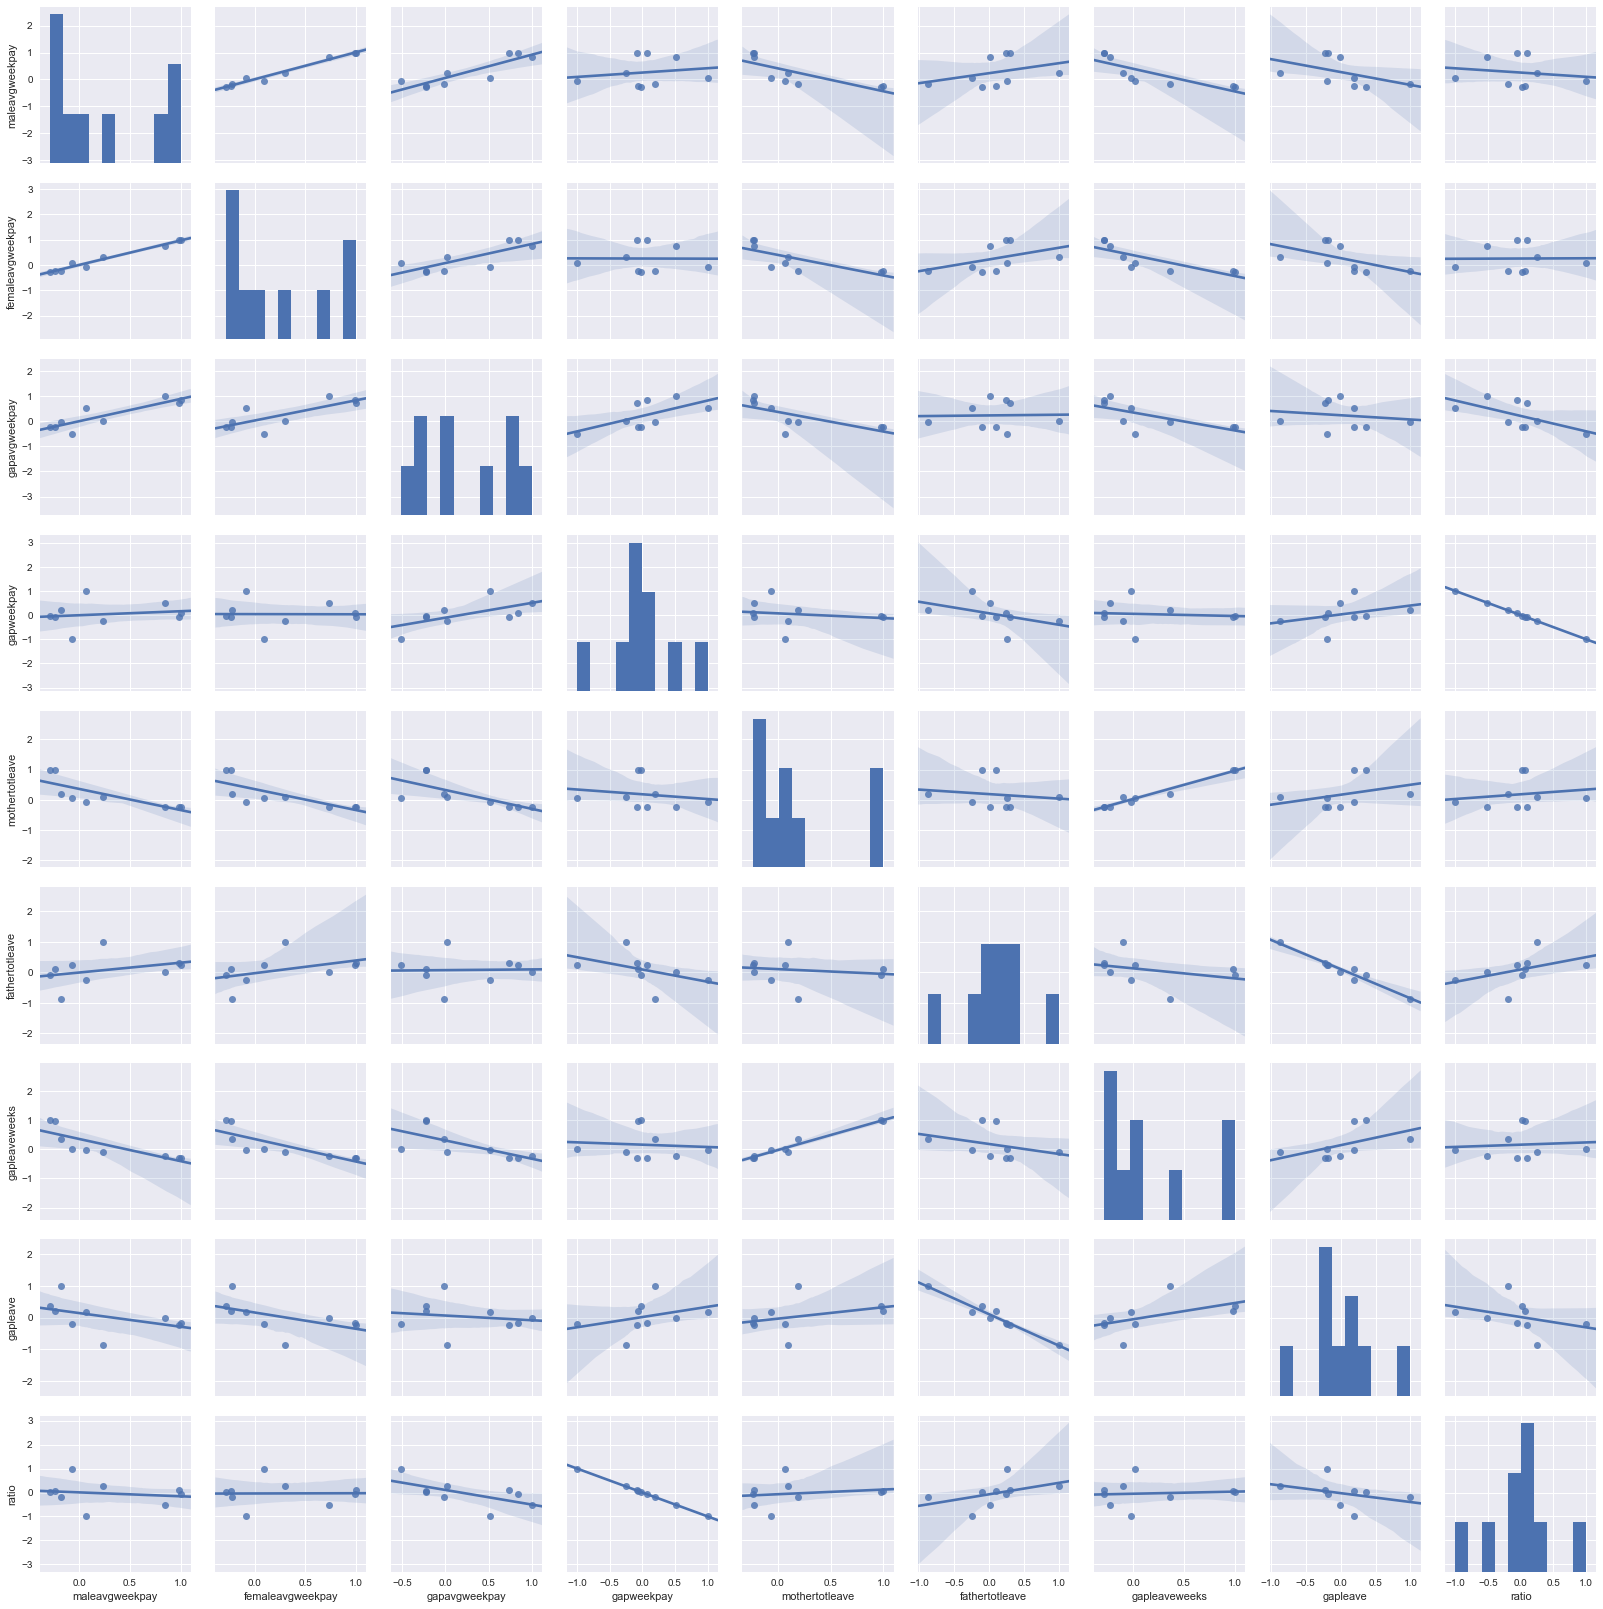

In [14]:
sns.pairplot(df[['maleavgweekpay','femaleavgweekpay','gapavgweekpay','gappay', \
        'mothertotleave','fathertotleave','gapleaveweeks','gapleave']].\
             dropna(how = 'any', axis = 0))

### Dataframe Split

In [15]:
# split dataset
dataTrain = df.iloc[:150]
dataTest = df.iloc[150:]

### Statistical analysis

With statsmodel

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/newbie/Envs/data2py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Find the relation between gapleave and average weekly salary(maleavgweekpay & femaleavgweekpay)

In [18]:
# Fit regression model
fitted_model = smf.ols(formula="gapleave ~ maleavgweekpay+femaleavgweekpay", data=dataTrain).fit()
# Inspect the results
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gapleave   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     21.25
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           7.82e-09
Time:                        20:04:32   Log-Likelihood:                 85.382
No. Observations:                 150   AIC:                            -164.8
Df Residuals:                     147   BIC:                            -155.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9783      0.021     47.278      0.000       0.937       1.019
maleavgweekpay       0.0002   9.99e-05      2.365      0.019    3.89e-05       0.000
femaleavgweekpay    -0.0004      0.000     -3.489      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       18.560   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.373
Skew:                          -0.891   Prob(JB):                     2.29e-05
Kurtosis:                       3.497   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Find the relation between gapleave and gapweekpay

In [19]:
# Fit regression model
fitted_model = smf.ols(formula="gapleave ~ gapweekpay", data=dataTrain).fit()
# Inspect the results
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gapleave   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.086
Date:                Sun, 22 Jul 2018   Prob (F-statistic):             0.0148
Time:                        20:04:34   Log-Likelihood:                 69.357
No. Observations:                 150   AIC:                            -134.7
Df Residuals:                     148   BIC:                            -128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8049      0.031     26.228      0.000       0.744       0.866
gapweekpay     0.3403      0.138      2.467      0.015       0.068       0.613
==============================================================================
Omnibus:                       25.766   Durbin-Watson:                   0.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.977
Skew:                          -1.159   Prob(JB):                     4.19e-08
Kurtosis:                       3.248   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot the regression

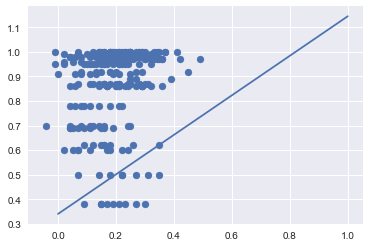

In [20]:
X = df["gapweekpay"]
Y = df["gapleave"]

# graph plot
plt.scatter(X,Y)
X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*fitted_model.params[0] + fitted_model.params[1])

plt.show()

### Conclusion

Low correlation between salary gap and paternal leave compensation

### References

 1. Ray, Rebecca, Janet C. Gornick, and John Schmitt. "Who cares? Assessing generosity and gender equality in parental leave policy designs in 21 countries." Journal of European Social Policy 20.3 (2010): 196-216.

 2. Thévenon, Olivier, and Anne Solaz. "Labour market effects of parental leave policies in OECD countries." OECD Social, Employment and Migration Working Papers, No. 141, OECD Publishing(2013).

 3. Schönberg, Uta, and Johannes Ludsteck. "Maternity leave legislation, female labor supply, and the family wage gap." (2007).

 4. Thévenon, Olivier. "Family policies in OECD countries: A comparative analysis." Population and development review 37.1 (2011): 57-87.

 5. Rege, Mari & Solli, Ingeborg. (2013). The Impact of Paternity Leave on Fathers' Future Earnings. Demography. 50. 10.1007/s13524-013-0233-1. 